In [121]:
# Data Ingestion, MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


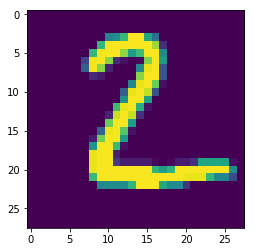

In [122]:
# Data Exploration
% matplotlib inline
from matplotlib import pyplot as plt
image = mnist.test.images[1].reshape([28,28])
plt.imshow(image)
label = mnist.test.labels[1]
print(label)

In [123]:
label.argmax(axis=0)

2

In [124]:
# len of training and testing data
print("The test data volume", len(mnist.test.images))
print("The train data volume", len(mnist.train.images))


The test data volume 10000
The train data volume 55000


In [125]:
# len of labels 
print("Testing", len(mnist.test.labels))
print("Training", len(mnist.train.labels))

Testing 10000
Training 55000


In [126]:
import tensorflow as tf

# Parameters
learning_rate = 0.00001
epochs = 1
batch_size = 128

# Number of samples to calculate validation and accuracy
test_valid_size = 256

# Network Parameters
n_classes = 10  # MNIST total classes (0-9 digits)
dropout = 0.75  # Dropout, probability to keep units

In [127]:
# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))}

In [128]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [129]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [130]:
def conv_net(x, weights, biases, dropout):
    # TODO : Layer 1 - 28*28*1 to 14*14*32 
    #conv1
    
    c1 = conv2d(x, weights['wc1'],biases['bc1'], 1)
    
    #maxpoolbc1
    m1 = maxpool2d(c1,2)
    
    
    # TODO: Layer 2 - 14*14*32 to 7*7*64
    #conv2
    c2 = conv2d(m1, weights['wc2'],biases['bc2'],1)
    
    #maxpool
    m2 = maxpool2d(c2, k=2)
    
    # TODO: Fully connected layer - 7*7*64 to 1024
    #reshape
    fc1 = tf.reshape(m2,[-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 =tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    #multiply and add bias 
    # relu activation
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    

    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [131]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

In [132]:
# Model
logits = conv_net(x, weights, biases, keep_prob)

In [133]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [134]:
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [135]:
# Initializing the variables
init = tf.global_variables_initializer()

In [136]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            valid_acc = sess.run(accuracy, feed_dict={
                x: mnist.validation.images[:test_valid_size],
                y: mnist.validation.labels[:test_valid_size],
                keep_prob: 1.})

            print('Epoch {:>2}, Batch {:>3} - Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch + 1,
                loss,
                valid_acc))
            
            
     # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
            x: mnist.test.images[:test_valid_size],
            y: mnist.test.labels[:test_valid_size],
            keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))       

Epoch  1, Batch   1 - Loss: 79147.5859 Validation Accuracy: 0.089844
Epoch  1, Batch   2 - Loss: 71141.1406 Validation Accuracy: 0.105469
Epoch  1, Batch   3 - Loss: 55610.8906 Validation Accuracy: 0.113281
Epoch  1, Batch   4 - Loss: 45595.3125 Validation Accuracy: 0.105469
Epoch  1, Batch   5 - Loss: 47477.4336 Validation Accuracy: 0.101562
Epoch  1, Batch   6 - Loss: 40763.3672 Validation Accuracy: 0.101562
Epoch  1, Batch   7 - Loss: 38953.6172 Validation Accuracy: 0.101562
Epoch  1, Batch   8 - Loss: 39898.5273 Validation Accuracy: 0.113281
Epoch  1, Batch   9 - Loss: 38906.8242 Validation Accuracy: 0.117188
Epoch  1, Batch  10 - Loss: 35654.6562 Validation Accuracy: 0.117188
Epoch  1, Batch  11 - Loss: 29960.7500 Validation Accuracy: 0.128906
Epoch  1, Batch  12 - Loss: 31533.2852 Validation Accuracy: 0.113281
Epoch  1, Batch  13 - Loss: 30077.7617 Validation Accuracy: 0.125000
Epoch  1, Batch  14 - Loss: 30676.0703 Validation Accuracy: 0.136719
Epoch  1, Batch  15 - Loss: 27617.

Epoch  1, Batch 120 - Loss:  5662.2910 Validation Accuracy: 0.511719
Epoch  1, Batch 121 - Loss:  5095.5771 Validation Accuracy: 0.500000
Epoch  1, Batch 122 - Loss:  5507.7559 Validation Accuracy: 0.503906
Epoch  1, Batch 123 - Loss:  4957.9121 Validation Accuracy: 0.507812
Epoch  1, Batch 124 - Loss:  5613.2539 Validation Accuracy: 0.515625
Epoch  1, Batch 125 - Loss:  6157.0869 Validation Accuracy: 0.515625
Epoch  1, Batch 126 - Loss:  5267.4570 Validation Accuracy: 0.511719
Epoch  1, Batch 127 - Loss:  5396.6084 Validation Accuracy: 0.523438
Epoch  1, Batch 128 - Loss:  5682.5454 Validation Accuracy: 0.527344
Epoch  1, Batch 129 - Loss:  6914.8521 Validation Accuracy: 0.535156
Epoch  1, Batch 130 - Loss:  5904.4834 Validation Accuracy: 0.535156
Epoch  1, Batch 131 - Loss:  6169.2188 Validation Accuracy: 0.527344
Epoch  1, Batch 132 - Loss:  6195.6138 Validation Accuracy: 0.523438
Epoch  1, Batch 133 - Loss:  4686.9297 Validation Accuracy: 0.535156
Epoch  1, Batch 134 - Loss:  5387.

Epoch  1, Batch 239 - Loss:  3155.4722 Validation Accuracy: 0.695312
Epoch  1, Batch 240 - Loss:  2441.1570 Validation Accuracy: 0.703125
Epoch  1, Batch 241 - Loss:  3474.0967 Validation Accuracy: 0.699219
Epoch  1, Batch 242 - Loss:  1993.9653 Validation Accuracy: 0.695312
Epoch  1, Batch 243 - Loss:  2823.5044 Validation Accuracy: 0.695312
Epoch  1, Batch 244 - Loss:  1688.4482 Validation Accuracy: 0.687500
Epoch  1, Batch 245 - Loss:  3241.8887 Validation Accuracy: 0.691406
Epoch  1, Batch 246 - Loss:  3376.0859 Validation Accuracy: 0.699219
Epoch  1, Batch 247 - Loss:  2473.9473 Validation Accuracy: 0.695312
Epoch  1, Batch 248 - Loss:  2924.3323 Validation Accuracy: 0.691406
Epoch  1, Batch 249 - Loss:  2552.2930 Validation Accuracy: 0.691406
Epoch  1, Batch 250 - Loss:  2330.9238 Validation Accuracy: 0.687500
Epoch  1, Batch 251 - Loss:  2978.2253 Validation Accuracy: 0.699219
Epoch  1, Batch 252 - Loss:  2406.5103 Validation Accuracy: 0.699219
Epoch  1, Batch 253 - Loss:  3336.

Epoch  1, Batch 358 - Loss:  2450.3008 Validation Accuracy: 0.722656
Epoch  1, Batch 359 - Loss:  2392.5293 Validation Accuracy: 0.726562
Epoch  1, Batch 360 - Loss:  1772.6821 Validation Accuracy: 0.730469
Epoch  1, Batch 361 - Loss:  2023.9775 Validation Accuracy: 0.734375
Epoch  1, Batch 362 - Loss:  1973.6666 Validation Accuracy: 0.730469
Epoch  1, Batch 363 - Loss:  1396.9231 Validation Accuracy: 0.730469
Epoch  1, Batch 364 - Loss:  2081.5742 Validation Accuracy: 0.722656
Epoch  1, Batch 365 - Loss:  1922.9619 Validation Accuracy: 0.726562
Epoch  1, Batch 366 - Loss:  2656.0483 Validation Accuracy: 0.726562
Epoch  1, Batch 367 - Loss:  1615.4546 Validation Accuracy: 0.730469
Epoch  1, Batch 368 - Loss:  2065.1042 Validation Accuracy: 0.730469
Epoch  1, Batch 369 - Loss:  1946.8922 Validation Accuracy: 0.726562
Epoch  1, Batch 370 - Loss:  2140.1763 Validation Accuracy: 0.726562
Epoch  1, Batch 371 - Loss:  1612.7471 Validation Accuracy: 0.730469
Epoch  1, Batch 372 - Loss:  2553.